# Wizualizacja COVID-19
Projekt odnosi się do aktualnego wydarzenia - pandemii COVID-19. Zakłada on odczyt danych z pliku w formacie csv, uporządkowanie ich oraz przeprowadzenie odpowiednich analiz, w celu uzyskania wykresów i wniosków. 

Wykonawcy:
1. Wojciech Strycharczyk, 255713
2. Kacper Równicki, 255949

Trzy najważniejsze aspekty projektu:
1. Użycie biblioteki `DataFrames`,
2. Uporządkowanie, analiza i wizualizacja danych oraz dyskusja wyników,
3. Prezentacja projektu w skoroszycie Jupytera.

## 0. Wprowadzenie
Dane pochodzą ze strony https://ourworldindata.org/coronavirus-data.

In [1]:
#Instalacja kernela, który nie pokazuje ostrzeżeń.
using IJulia
IJulia.installkernel("Julia nodeps", "--depwarn=no")

┌ Info: Installing Julia nodeps kernelspec in /Users/Kacper/Library/Jupyter/kernels/julia-nodeps-1.3
└ @ IJulia /Users/Kacper/.julia/packages/IJulia/yLI42/deps/kspec.jl:78


"/Users/Kacper/Library/Jupyter/kernels/julia-nodeps-1.3"

Zacznijmy od załadowania odpowiednich bibliotek.

In [2]:
using DataFrames
using CSV
using Plots

pyplot()

Plots.PyPlotBackend()

Możemy rozpocząć pracę. Rozpoczynamy od odczytania `DataFrame`, oraz uzyskania podstawowych informacji o naszych danych.

In [3]:
covid = DataFrame(CSV.File("covid-data.csv")); first(covid, 6)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths
,String?,String,Dates.D…,Int64,Int64,Int64,Int64
1,ABW,Aruba,2020-03-13,2,2,0,0
2,ABW,Aruba,2020-03-20,4,2,0,0
3,ABW,Aruba,2020-03-24,12,8,0,0
4,ABW,Aruba,2020-03-25,17,5,0,0
5,ABW,Aruba,2020-03-26,19,2,0,0
6,ABW,Aruba,2020-03-27,28,9,0,0


Przyjrzyjmy się wszystkim kolumnom oraz ich jednostkom.

In [4]:
for name in names(covid)
    println(name)
end

iso_code
location
date
total_cases
new_cases
total_deaths
new_deaths
total_cases_per_million
new_cases_per_million
total_deaths_per_million
new_deaths_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
tests_units
stringency_index
population
population_density
median_age
aged_65_older
aged_70_older
gdp_per_capita
extreme_poverty
cvd_death_rate
diabetes_prevalence
female_smokers
male_smokers
handwashing_facilities
hospital_beds_per_100k


Zaletą zaimportowanego pliku `.csv` jest dostęp do bardzo specyficznych danych każdego kraju, dzięki czemu możemy poruszyć kilka ciekawych kwestii w tym projekcie.

## 1. Początek

### Wybuch epidemii w Chinach
Epidemia koronawirusa rozpoczęła się na przełomie roku 2019 i 2020. To wtedy, z Chin, zaczynały napływac pierwsze informacje o nowej, nieznanej chorobie. Zobaczmy jak szybko rosła liczba zakażonych COVID-19. 

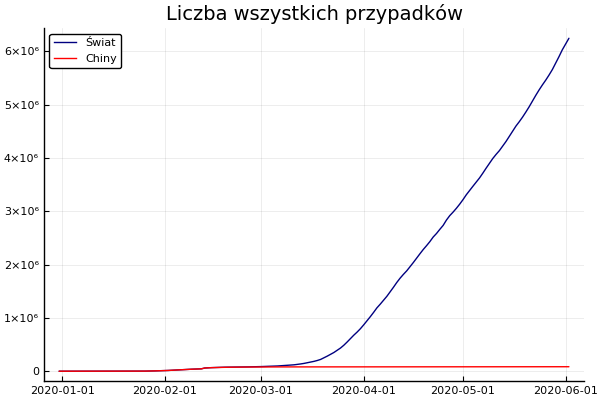

In [5]:
worldwide = covid[covid[:location] .== "World", :]
china = covid[covid[:location] .== "China", :]

plot(worldwide[:date], worldwide[:total_cases], label = "Świat",
                                                title = "Liczba wszystkich przypadków",
                                                color = :navy)

plot!(china[:date], china[:total_cases], label="Chiny", color = :red)

Możemy zauważyć, że do początku marca problem koronawirusa dotyczył niemal tylko i wyłącznie Chin. Dopiero potem liczba chorych zaczęła lawinowo rosnąć na całym świecie. Skalę zjawiska dobrze pokazuje także wykres o **skali logarytmicznej**.

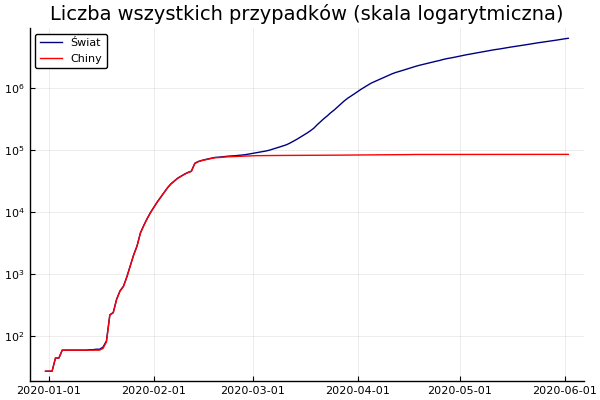

In [6]:
plot(worldwide[:date], worldwide[:total_cases], label = "Świat",
                                                title = "Liczba wszystkich przypadków (skala logarytmiczna)",
                                                color = :navy,
                                                yaxis = :log)

plot!(china[:date], china[:total_cases], label="Chiny",
                                                color = :red,
                                                yaxis = :log)

Można powiedzieć, że epidemia w Chinach zakończyła się na początku marca. Widać to na wykresie słupkowym nowych przypadków. Uwagę przykłuwa aż 15000 przypadkó 13 lutego. Było to spowodowane zmianą sposobu klasyfikacji chorych - przed tym dniem za chorych uznawano wyłącznie osoby hospitalizowane. Tamtego dnia zdecydowano się na dopisanie przypadków, które nie wymagały leczenia w szpitalu, a dały pozytywny wynik testu.


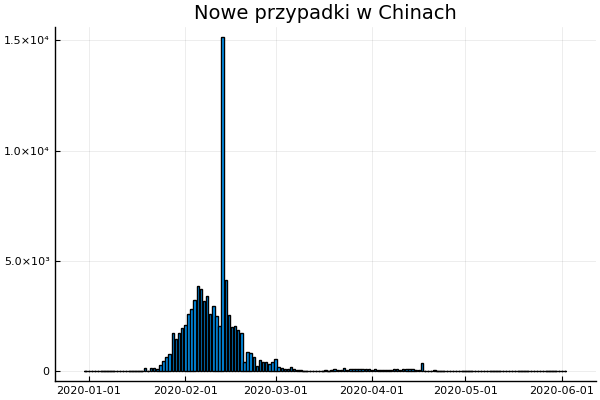

In [7]:
bar(china[:date], china[:new_cases], title="Nowe przypadki w Chinach", label=:none)

### Ogniska zachorowań
Spośród wszystkich krajów, możemy wyróżnić kilka, które mają najwięcej zachorowań.

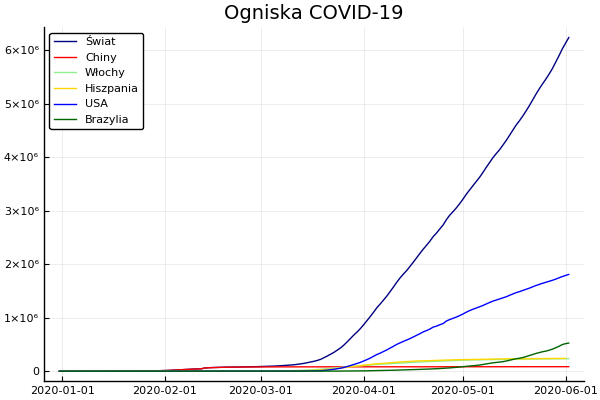

In [18]:
worldwide = covid[covid[:location] .== "World", :]
china = covid[covid[:location] .== "China", :]
italy = covid[covid[:location] .== "Italy", :]
spain = covid[covid[:location] .== "Spain", :]
usa = covid[covid[:location] .== "United States", :]
brazil = covid[covid[:location] .== "Brazil", :]

plot(worldwide[:date], worldwide[:total_cases], label = "Świat",
                                                title = "Ogniska COVID-19",
                                                color = :navy)

plot!(china[:date], china[:total_cases], label="Chiny", color = :red)
plot!(italy[:date], italy[:total_cases], label="Włochy", color = :lightgreen)
plot!(spain[:date], spain[:total_cases], label="Hiszpania", color = :gold)
plot!(usa[:date], usa[:total_cases], label="USA", color = :blue)
plot!(brazil[:date], brazil[:total_cases], label="Brazylia", color = :darkgreen)


### Zależność między zaraźliwością Covid-19 i populacją kraju
Sprawdźmy, jak wyglądają statystki w przeliczeniu na milion mieszkańców.  

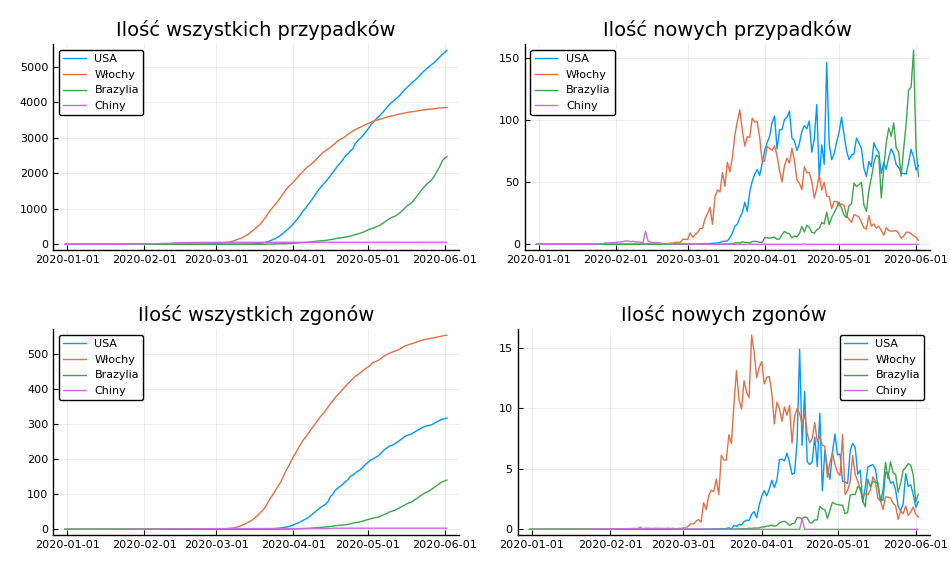

In [19]:
using Plots.PlotMeasures #Aby posługiwać się px jako jednostkami

p1 = plot(usa[:date], usa[:total_cases_per_million], label="USA", title="Ilość wszystkich przypadków")
plot!(italy[:date], italy[:total_cases_per_million], label="Włochy")
plot!(brazil[:date], brazil[:total_cases_per_million], label="Brazylia")
plot!(china[:date], china[:total_cases_per_million], label="Chiny")

p2 = plot(usa[:date], usa[:new_cases_per_million], label="USA", title="Ilość nowych przypadków")
plot!(italy[:date], italy[:new_cases_per_million], label="Włochy")
plot!(brazil[:date], brazil[:new_cases_per_million], label="Brazylia")
plot!(china[:date], china[:new_cases_per_million], label="Chiny")

p3 = plot(usa[:date], usa[:total_deaths_per_million], label="USA", title = "Ilość wszystkich zgonów")
plot!(italy[:date], italy[:total_deaths_per_million], label="Włochy")
plot!(brazil[:date], brazil[:total_deaths_per_million], label="Brazylia")
plot!(china[:date], china[:total_deaths_per_million], label="Chiny")

p4 = plot(usa[:date], usa[:new_deaths_per_million], label="USA", title = "Ilość nowych zgonów")
plot!(italy[:date], italy[:new_deaths_per_million], label="Włochy")
plot!(brazil[:date], brazil[:new_deaths_per_million], label="Brazylia")
plot!(china[:date], china[:new_deaths_per_million], label="Chiny")

plot(p1,p2, p3, p4, layout=4, size=size=(950,570), tight_layout=true, margin=20px)




## Wszystkie wykresy prezentują odpowiednie wartości w przeliczeniu na milion mieszkańców.